### Importing The Modules

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

### Reading The Dataset

In [2]:
diabetes_df = pd.read_csv('../Data/Input/diabetes.csv')
diabetes_df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### Analyzing The Data

In [3]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_df.shape

(768, 9)

In [5]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
diabetes_df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
diabetes_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [8]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data Visualization With Pair Plott And HeatMap

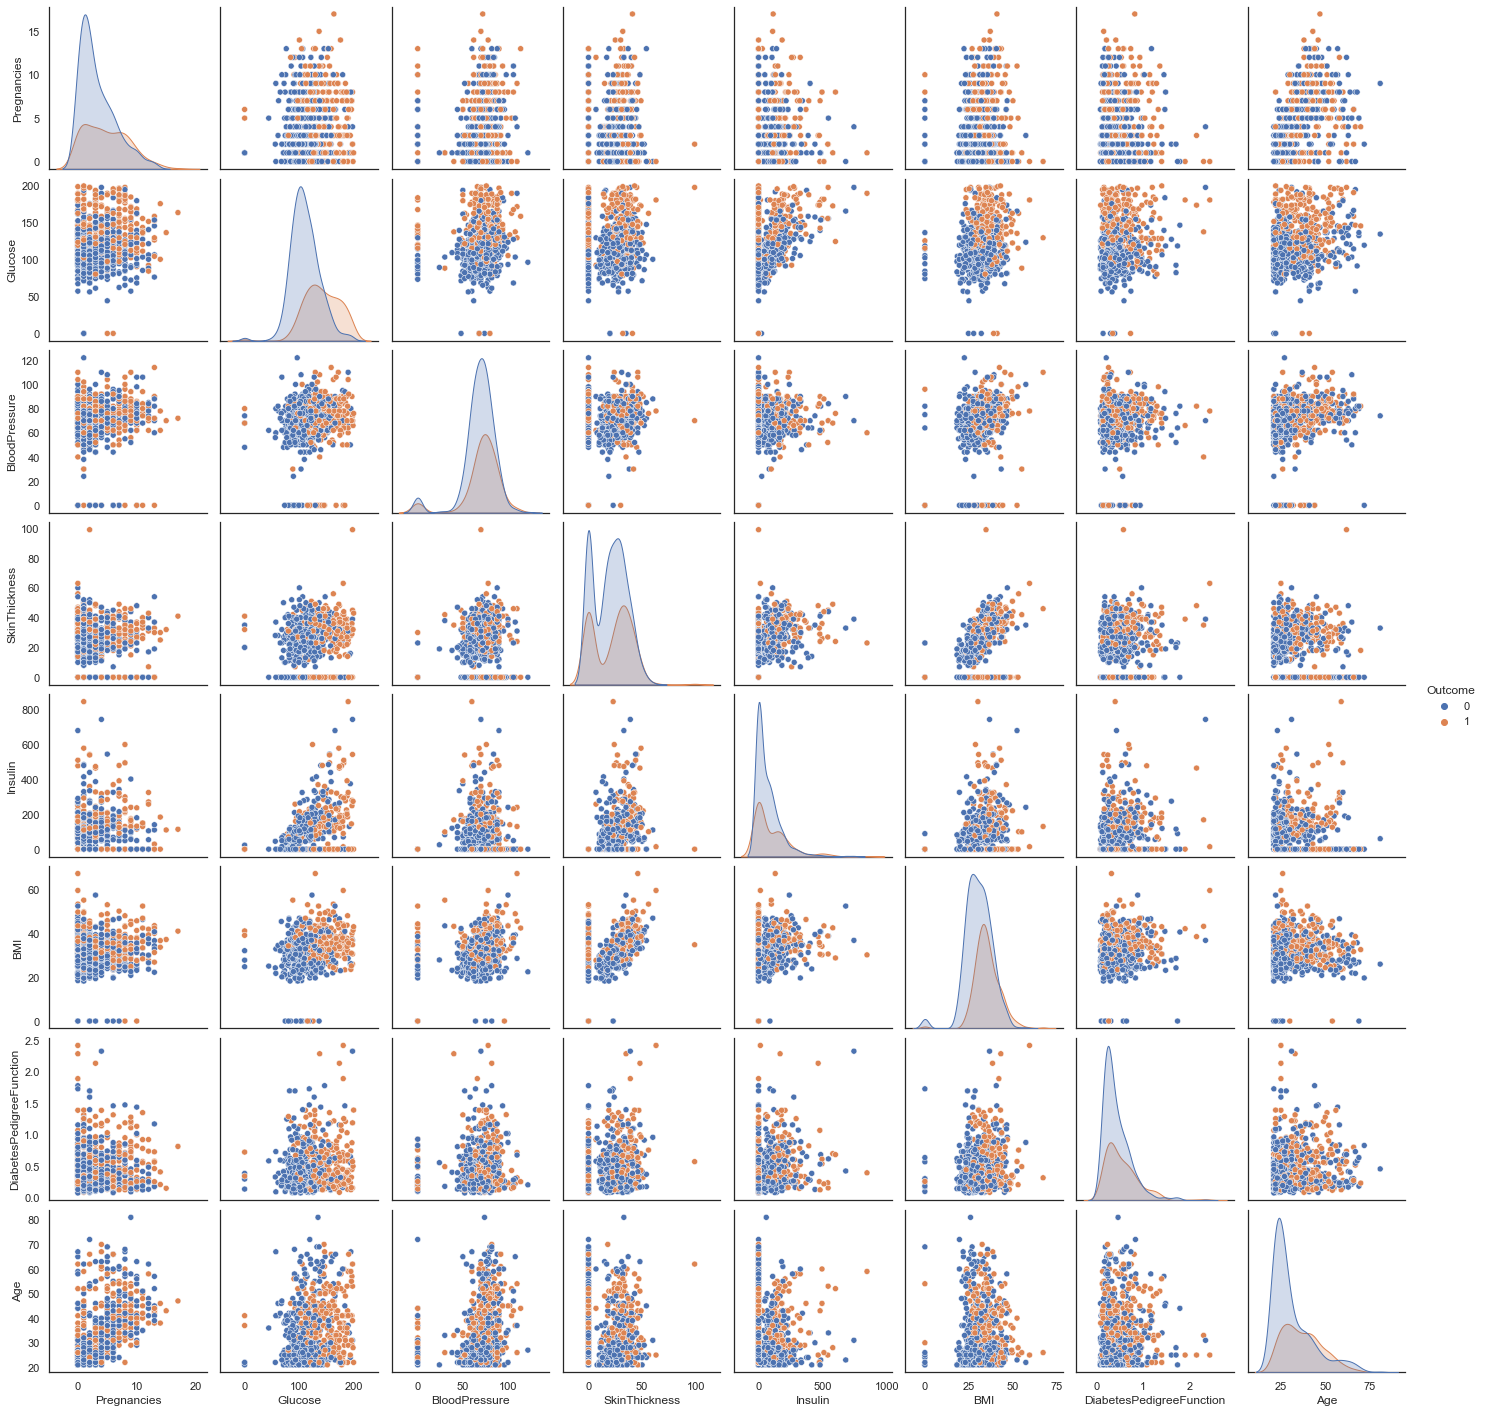

In [9]:
sns.set(rc={'figure.figsize':(10,80)})
sns.set_style(style='white')

sns.pairplot(diabetes_df, hue='Outcome')

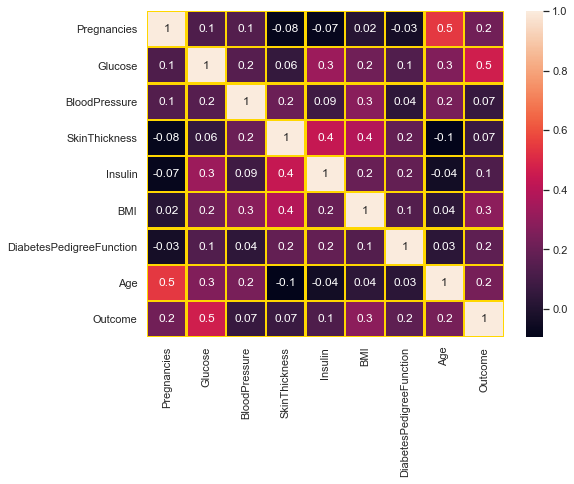

In [10]:
plt.figure(figsize = (8,6)) 
sns.heatmap(diabetes_df.corr(),robust=True,fmt='.1g',linewidths=1.3,linecolor = 'gold', annot=True,);

### Data PreProcessing

In [11]:
scaler = MinMaxScaler()
scaler.fit(diabetes_df)
diabetes_scaled = pd.DataFrame(scaler.transform(diabetes_df), columns=diabetes_df.columns)
diabetes_scaled.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.234415  0.483333      1.0  
1                  0.116567  0.166667      0.0  
2                  0.253629  0.183333      1.0  
3                  0.038002  0.000000      0.0  
4                  0.943638  0.200000      1.0

In [12]:
X = diabetes_scaled.drop("Outcome",axis=1)
y = diabetes_scaled["Outcome"]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1234)


#### Class Distribution

In [14]:
print("Number of samples for Outcome 0 are : ",len(diabetes_df[diabetes_df['Outcome']==0]))
print("Number of samples for Outcome 1 are : ",len(diabetes_df[diabetes_df['Outcome']==1]))


Number of samples for Outcome 0 are :  500
Number of samples for Outcome 1 are :  268


The Samples are imbalanced.
We can use SMOTE to deal with imbalanced data

In [15]:
print("Percentage of Positive Values in training data before Smote :",y_train.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data before Smote :",y_train.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")

print()
print('Shape of X before applying SMOTE :', X_train.shape)


smote = SMOTE()
X_train,y_train = smote.fit_resample(X_train,y_train)

print('Shape of X after applying SMOTE : ', X_train.shape)
print()

print("Percentage of Positive Values in training data after Smote :",y_train.value_counts(normalize=True)[1]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")
print("Percentage of Negative Values in training data after Smote :",y_train.value_counts(normalize=True)[0]/(y_train.value_counts(normalize=True)[0]+y_train.value_counts(normalize=True)[1])*100,"%")

Percentage of Positive Values in training data before Smote : 34.20138888888889 %
Percentage of Negative Values in training data before Smote : 65.79861111111111 %

Shape of X before applying SMOTE : (576, 8)
Shape of X after applying SMOTE :  (758, 8)

Percentage of Positive Values in training data after Smote : 50.0 %
Percentage of Negative Values in training data after Smote : 50.0 %


### The Models

#### K Nearest Neighbours

In [16]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

conf = confusion_matrix(y_test, y_pred1)
classi = classification_report(y_test, y_pred1)
print ("Confusion Matrix : \n", conf)
print()
print ("Classification Report : \n", classi)
print()
print ("The accuracy of KNN is : ", accuracy_score(y_test, y_pred1)*100, "%")
print()
print("Precision score for KNN is :",precision_score(y_test, y_pred1)*100, "%")

Confusion Matrix : 
 [[88 33]
 [29 42]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.75      0.73      0.74       121
         1.0       0.56      0.59      0.58        71

    accuracy                           0.68       192
   macro avg       0.66      0.66      0.66       192
weighted avg       0.68      0.68      0.68       192


The accuracy of KNN is :  67.70833333333334 %

Precision score for KNN is : 56.00000000000001 %


#### Bernoulli Naive Bayes

In [17]:
clf2 = BernoulliNB()
clf2.fit(X_train, y_train)  
y_pred2 = clf2.predict(X_test)

conf = confusion_matrix(y_test, y_pred2)
classi = classification_report(y_test, y_pred2)
print ("Confusion Matrix : \n", conf)
print()
print ("Classification Report : \n", classi)
print ("The accuracy of Bernoulli Naive Bayes is : ", accuracy_score(y_test, y_pred2)*100, "%")
print()
print("Precision score for Bernoulli Naive Bayes is :",precision_score(y_test, y_pred2,)*100, "%")

Confusion Matrix : 
 [[31 90]
 [ 8 63]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.79      0.26      0.39       121
         1.0       0.41      0.89      0.56        71

    accuracy                           0.49       192
   macro avg       0.60      0.57      0.47       192
weighted avg       0.65      0.49      0.45       192

The accuracy of Bernoulli Naive Bayes is :  48.95833333333333 %

Precision score for Bernoulli Naive Bayes is : 41.17647058823529 %


#### Gaussian Naive Bayes

In [18]:
clf3 = GaussianNB()
clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)
  
conf = confusion_matrix(y_test, y_pred3)
classi = classification_report(y_test, y_pred3)
print ("Confusion Matrix : \n", conf)
print()
print ("Classification Report : \n", classi)
print ("The accuracy of Gaussian Naive Bayes is : ", accuracy_score(y_test, y_pred3)*100, "%")
print()
print("Precision score for Gaussian Naive Bayes is :",precision_score(y_test, y_pred3,)*100, "%")

Confusion Matrix : 
 [[99 22]
 [24 47]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       121
         1.0       0.68      0.66      0.67        71

    accuracy                           0.76       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.76      0.76      0.76       192

The accuracy of Gaussian Naive Bayes is :  76.04166666666666 %

Precision score for Gaussian Naive Bayes is : 68.11594202898551 %


#### Support Vector Machine

In [19]:
clf4 = SVC()
clf4.fit(X_train, y_train)
y_pred4 = clf4.predict(X_test)

conf = confusion_matrix(y_test, y_pred4)
classi = classification_report(y_test, y_pred4)
print ("Confusion Matrix : \n", conf)
print()
print ("Classification Report : \n", classi)
print ("The accuracy of SVM is : ", accuracy_score(y_test, y_pred4)*100, "%")
print()
print("Precision score for SVM is :",precision_score(y_test, y_pred4,)*100, "%")

Confusion Matrix : 
 [[94 27]
 [21 50]]

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.82      0.78      0.80       121
         1.0       0.65      0.70      0.68        71

    accuracy                           0.75       192
   macro avg       0.73      0.74      0.74       192
weighted avg       0.76      0.75      0.75       192

The accuracy of SVM is :  75.0 %

Precision score for SVM is : 64.93506493506493 %


### Model Comparision According To The Score

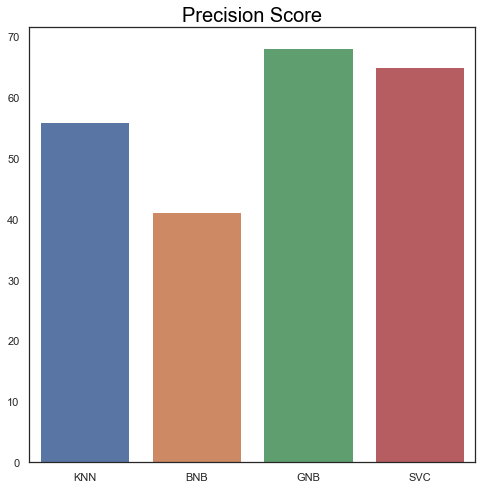

In [20]:
index = ["KNN","BNB","GNB", "SVC"]
regressions = [precision_score(y_test, y_pred1)*100,precision_score(y_test, y_pred2)*100,precision_score(y_test, y_pred3)*100,precision_score(y_test, y_pred4)*100]

plt.figure(figsize=(8,8))
sns.barplot(x=index,y=regressions)
plt.xticks()
plt.title('Precision Score',color = 'black',fontsize=20);

In [21]:
index = ["KNN","BNB","GNB", "SVC"]
regressions = [accuracy_score(y_test, y_pred1)*100,accuracy_score(y_test, y_pred2)*100,accuracy_score(y_test, y_pred3)*100,accuracy_score(y_test, y_pred4)*100]

import plotly.express as px

fig = px.pie(diabetes_scaled, values=regressions, names=index, title='Accuracy Score Results')
fig.show()

Gaussian Naive bayes is performing the best in context of precision and accuracy.